In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving churn.csv to churn.csv
User uploaded file "churn.csv" with length 411610 bytes


In [0]:
import pandas as pd

df_churn=pd.read_csv("churn.csv", sep=',', header=0)

print(df_churn.columns)

print(df_churn.count())

df_churn.head(10)

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')
state                            5000
account_length                   5000
area_code                        5000
phone_number                     5000
international_plan               5000
voice_mail_plan                  5000
number_vmail_messages            5000
total_day_minutes                5000
total_day_calls                  5000
total_day_charge                 5000
total_eve_minutes                5000
total_eve_calls                  5000
total_eve_charge                 5000
total_night_minutes  

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,1,118,510,3355,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,19,121,510,1516,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,24,147,415,116,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,18,117,408,425,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,49,141,415,163,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


In [0]:
df_churn.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,436.911400,2499.500000,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,14.80348,39.69456,42.209182,1443.520003,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,0.00000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,73.00000,408.000000,1249.750000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.00000,100.00000,415.000000,2499.500000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.00000,127.00000,415.000000,3749.250000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,50.00000,243.00000,510.000000,4999.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


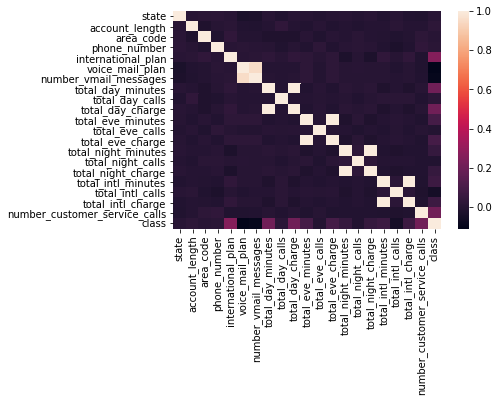

In [0]:
import seaborn as sns

# using pearson correlation because the variables are all numerical
col_correlation=df_churn.corr(method='pearson')
sns.heatmap(col_correlation)

# df_churn.corr(method='pearson')

In [0]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=0, max_depth=2)
df_churn['class_str'] = df_churn['class'].apply(lambda _: str(_))

clf.fit(df_churn[[_ for _ in df_churn.columns if _ in ('international_plan','total_day_minutes','total_day_charge','number_customer_service_calls','voice_mail_plan')]],df_churn['class'])



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

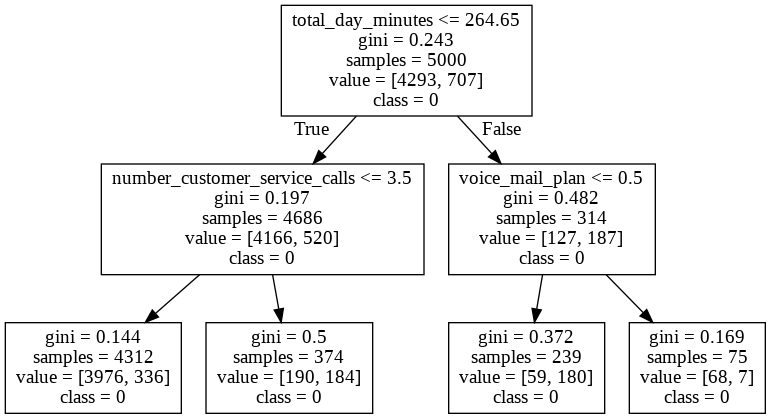

In [0]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=[_ for _ in df_churn.columns if _ in ('international_plan','total_day_minutes','total_day_charge','number_customer_service_calls','voice_mail_plan')],
                                class_names=df_churn['class_str'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

Text(0, 0.5, 'Number of Subs')

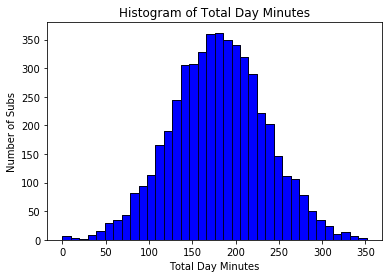

In [0]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(df_churn['total_day_minutes'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(df_churn['total_day_minutes'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Total Day Minutes')
plt.xlabel('Total Day Minutes')
plt.ylabel('Number of Subs')

Text(0, 0.5, 'Number of Subs')

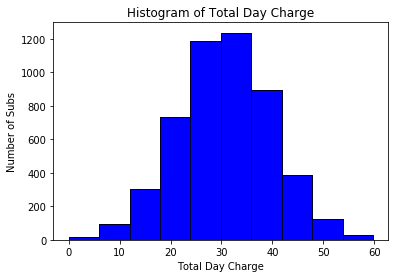

In [0]:
# matplotlib histogram
plt.hist(df_churn['total_day_charge'], color = 'blue', edgecolor = 'black',
         bins = int(10))

# seaborn histogram
sns.distplot(df_churn['total_day_charge'], hist=True, kde=False, 
             bins=int(10), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Total Day Charge')
plt.xlabel('Total Day Charge')
plt.ylabel('Number of Subs')

Text(0, 0.5, 'Number of Subs')

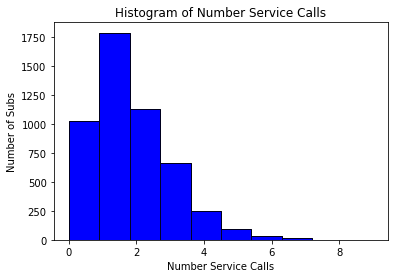

In [0]:
# matplotlib histogram
plt.hist(df_churn['number_customer_service_calls'], color = 'blue', edgecolor = 'black',
         bins = int(10))

# seaborn histogram
sns.distplot(df_churn['number_customer_service_calls'], hist=True, kde=False, 
             bins=int(10), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Number Service Calls')
plt.xlabel('Number Service Calls')
plt.ylabel('Number of Subs')

Text(0, 0.5, 'Number of Subs')

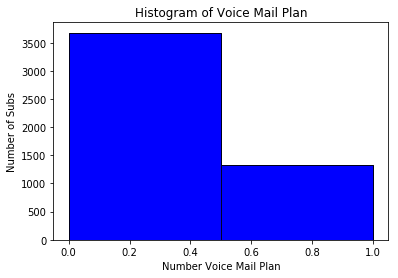

In [0]:
# matplotlib histogram
plt.hist(df_churn['voice_mail_plan'], color = 'blue', edgecolor = 'black',
         bins = int(2))

# seaborn histogram
sns.distplot(df_churn['voice_mail_plan'], hist=True, kde=False, 
             bins=int(2), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Voice Mail Plan')
plt.xlabel('Number Voice Mail Plan')
plt.ylabel('Number of Subs')

Text(0, 0.5, 'Number of Subs')

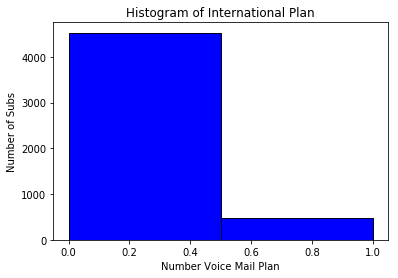

In [0]:
# matplotlib histogram
plt.hist(df_churn['international_plan'], color = 'blue', edgecolor = 'black',
         bins = int(2))

# seaborn histogram
sns.distplot(df_churn['international_plan'], hist=True, kde=False, 
             bins=int(2), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of International Plan')
plt.xlabel('Number Voice Mail Plan')
plt.ylabel('Number of Subs')

In [0]:
size = 10        # sample size per strata/group
replace = False  # with replacement

fn = lambda x: x.sample(size, random_state=10, replace=False)
df_churn.groupby('class', as_index=False).apply(fn)

state  account_length  ...  class  class_str
0 4962     50              91  ...      0          0
  4150      3             145  ...      0          0
  2734     25             145  ...      0          0
  3173     37             133  ...      0          0
  1548     20             102  ...      0          0
  4029     19             116  ...      0          0
  1863     42              94  ...      0          0
  1565      6             123  ...      0          0
  2151     27              72  ...      0          0
  2818     32             147  ...      0          0
1 3428     49              43  ...      1          1
  416       8             224  ...      1          1
  2160     33              94  ...      1          1
  2666     39             103  ...      1          1
  3754      8             102  ...      1          1
  2672     25              65  ...      1          1
  1528     35             143  ...      1          1
  1299     44              49  ...      1          1
  3409     49              64  ...      1          1
  1984     42             112  ...      1          1

[20 rows x 22 columns]